#### 发现2017-05-04，2017-05-08，2017-05-09，2017-06-16，2017-06-27，2017-06-28好多站点没数据

从原始数据出发进行检验

In [1]:
import csv
import numpy as np
import pandas as pd
import datetime
from tqdm import tqdm

原始数据的日期是全的，是某些站点在某些天数据缺失，画图展示那些站点哪些天无数据

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import seaborn as sns

In [13]:
root_path = '/data6/peiyan/SH-METR/results/' 
stationInfo = pd.read_csv('../../Metro/station_transInfo_cleaned.csv')
raw_data = pd.read_csv(os.path.join(root_path, 'metroData_Demandflow_10.csv'))
dict_staionName = dict(zip(stationInfo['stationID'], stationInfo['name']))
dict_stationLoc = dict(zip(stationInfo['stationID'], zip(stationInfo['lon'],stationInfo['lat'])))
stationID_List = list(stationInfo['stationID'])

raw_data

,date,timeslot,startTime,endTime,station,inFlow,outFlow,CinFlow,HO_inFlow,WO_inFlow,CoutFlow,HO_outFlow,WO_outFlow
0,20170501,0,60000,61000,112,29,32,9,15,0,11,13,1
1,20170501,0,60000,61000,113,142,102,40,51,4,30,41,1
2,20170501,0,60000,61000,114,66,35,17,19,7,12,10,2
3,20170501,0,60000,61000,119,23,14,6,9,0,1,3,2
4,20170501,0,60000,61000,124,17,21,2,4,2,0,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3788887,20170831,12545,225000,230000,2053,6,26,2,0,1,8,6,4
3788888,20170831,12545,225000,230000,2054,18,110,5,2,6,19,39,12
3788889,20170831,12545,225000,230000,2055,5,80,0,1,2,19,23,6
3788890,20170831,12545,225000,230000,2056,33,99,8,4,1,20,31,6


In [14]:
dateSet = sorted(list(set(raw_data.values[:,0])))
stationSet = list(set(raw_data.values[:,4]))

In [17]:
stationAvgFlow = [[] for i in range(len(stationID_List))] # 计算 inFlow + outFlow 按天平均

curr_date = 20170501
currDayFlow = [0 for i in range(len(stationID_List))]
for line in tqdm(raw_data.values):
    if curr_date != line[0]:
        for i in range(len(stationID_List)):
            stationAvgFlow[i].append(currDayFlow[i])
        curr_date = line [0]
        currDayFlow = [ 0 for i in range(len(stationID_List))]

    currDayFlow[stationID_List.index(line[4])] += (line[5] + line[6])

stationAvgFlow = [np.mean(i) for i in stationAvgFlow]
stationAvgFlow = np.array(stationAvgFlow)


display_mat = np.zeros((len(dateSet),len(stationSet)))

for line in tqdm(raw_data.values): # 判断数据缺失
    if curr_date != line[0]:
        for i in range(len(stationID_List)):
            if currDayFlow[i] > 0.1*stationAvgFlow[i]: # def of missing data
                display_mat[dateSet.index(curr_date), i] = 1
        curr_date = line [0]
        currDayFlow = [ 0 for i in range(len(stationID_List))]

    currDayFlow[stationID_List.index(line[4])] += (line[5] + line[6])


100%|██████████| 3788892/3788892 [00:39<00:00, 94931.17it/s] 


([<matplotlib.axis.YTick at 0x7f82cc9c0c10>,
 [Text(0, 0, '20170501'),
  Text(0, 10, '20170511'),
  Text(0, 20, '20170521'),
  Text(0, 30, '20170531'),
  Text(0, 40, '20170610'),
  Text(0, 50, '20170620'),
  Text(0, 60, '20170630'),
  Text(0, 70, '20170710'),
  Text(0, 80, '20170720'),
  Text(0, 90, '20170730'),
  Text(0, 100, '20170809'),
  Text(0, 110, '20170819'),
  Text(0, 120, '20170829')])

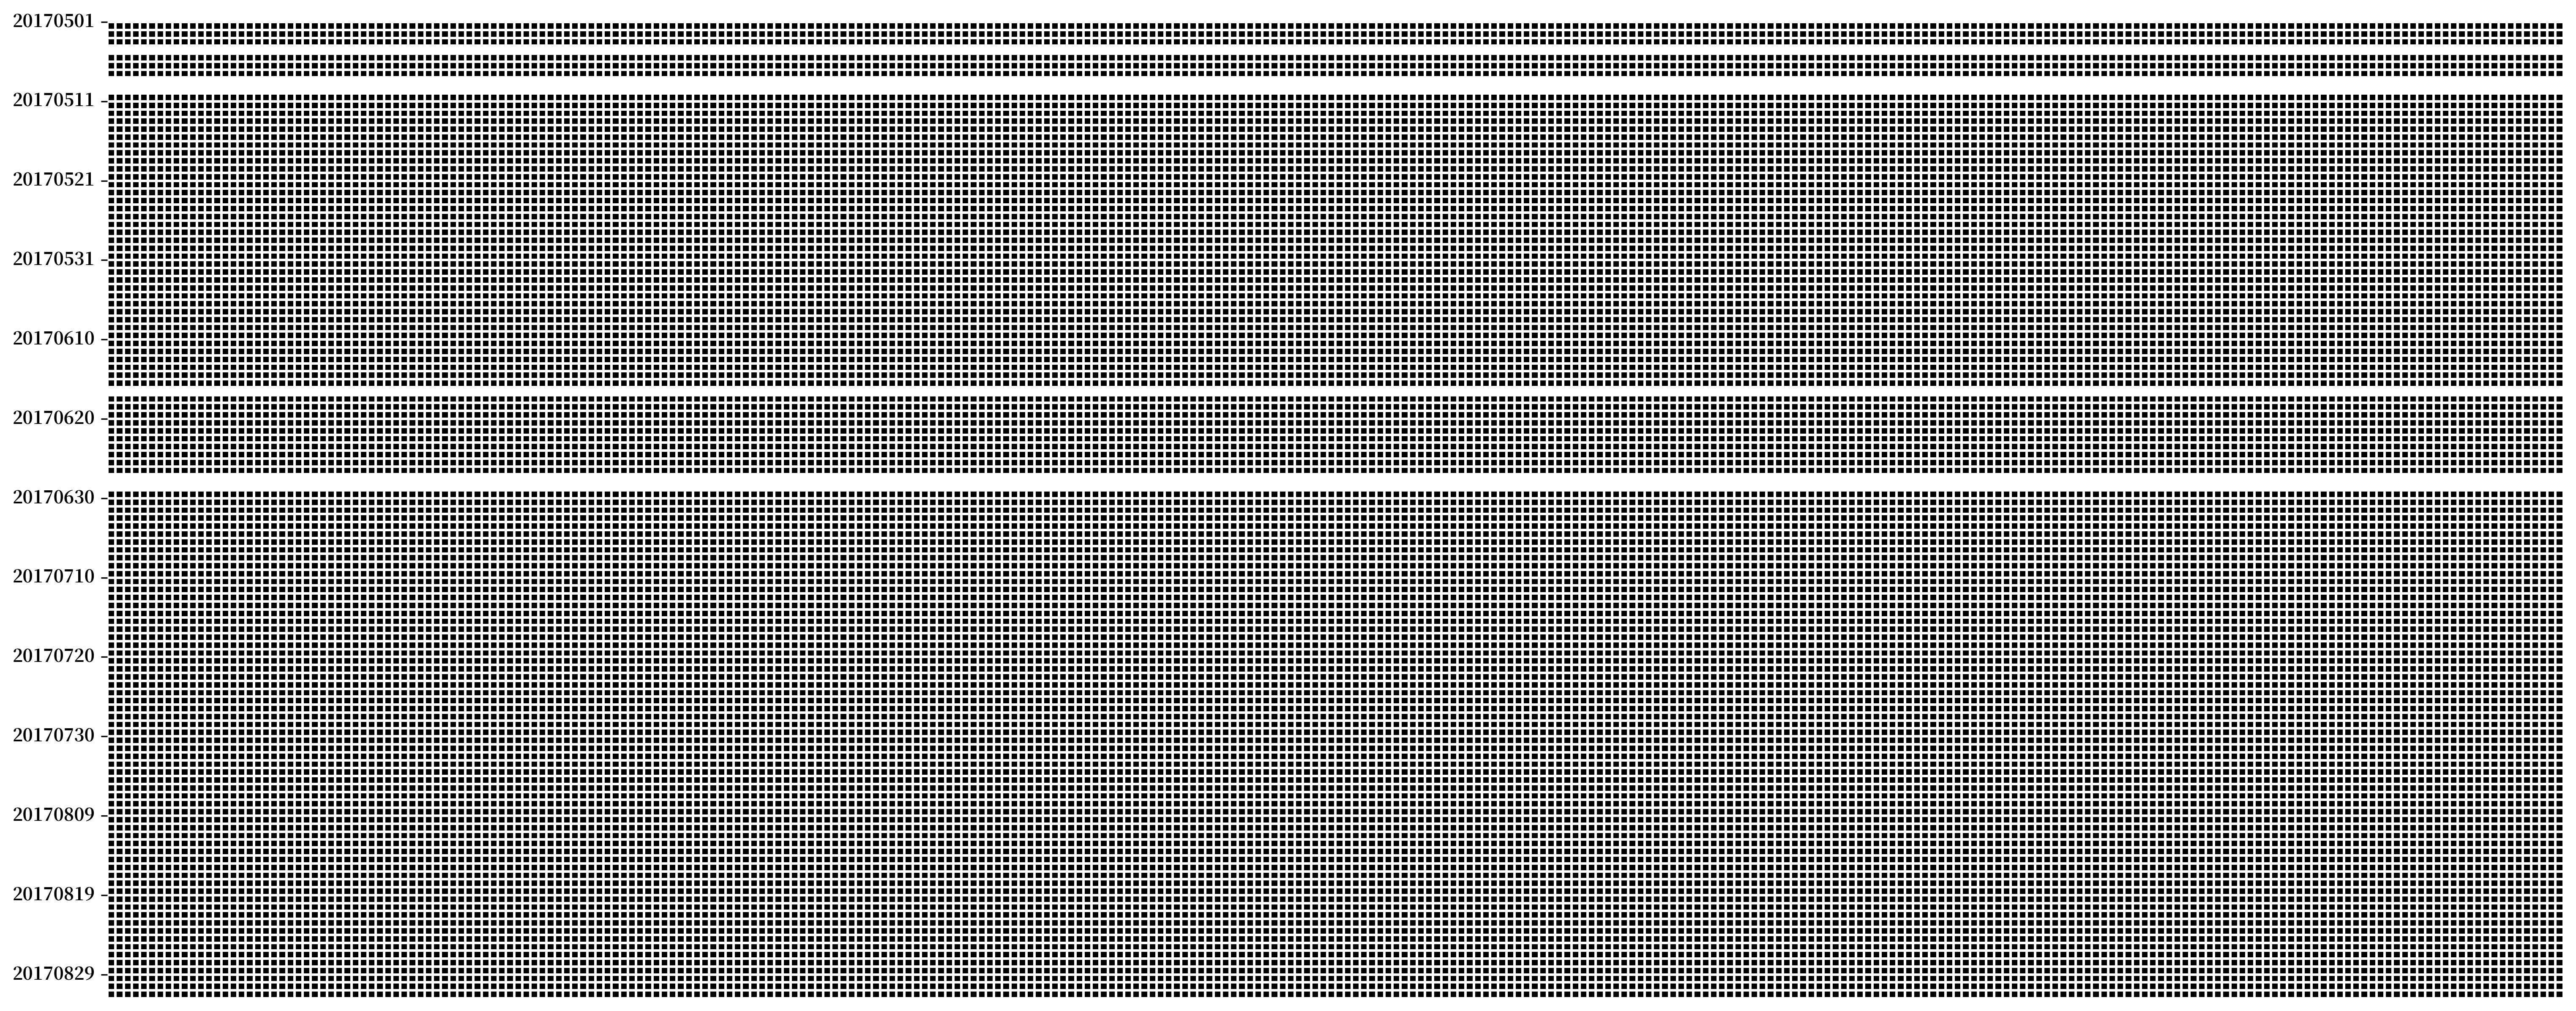

In [18]:
plt.figure(figsize=(25, 10), dpi=300)

ax=sns.heatmap(display_mat, 
            cmap='Greys', 
            cbar=False,
            linewidths=1,
            linecolor='white',
            xticklabels=False) 

plt.yticks(ticks=np.arange(0, 123, step=10), labels=dateSet[::10])